In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Neural Networks

## XNOR

In [18]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [19]:
dataset.toDataframe()

X1  X2  X1 XNOR X2
0   0   0           1
1   0   1           0
2   1   0           0
3   1   1           1

In [20]:
from si.supervised import NN, Dense, Activation
from si.util.metrics import cross_entropy #, cross_entropy_prime
from si.util.activation import Sigmoid

In [21]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.set_weights(w1,b1)

In [22]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.set_weights(w2,b2)

In [23]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fitted = True

In [24]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [25]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [26]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [27]:
nn2.fit(dataset)

 epoch 1/100000 error = 0.31602448022115903
 epoch 2/100000 error = 0.3144920989764798
 epoch 3/100000 error = 0.3129709501251633
 epoch 4/100000 error = 0.31146190289257963
 epoch 5/100000 error = 0.30996581099782095
 epoch 6/100000 error = 0.3084835101712414
 epoch 7/100000 error = 0.3070158157310448
 epoch 8/100000 error = 0.30556352023503075
 epoch 9/100000 error = 0.30412739122312854
 epoch 10/100000 error = 0.30270816906567666
 epoch 11/100000 error = 0.3013065649315596
 epoch 12/100000 error = 0.2999232588893064
 epoch 13/100000 error = 0.298558898153089
 epoch 14/100000 error = 0.29721409548426003
 epoch 15/100000 error = 0.295889427757657
 epoch 16/100000 error = 0.29458543470038867
 epoch 17/100000 error = 0.29330261780923705
 epoch 18/100000 error = 0.2920414394511761
 epoch 19/100000 error = 0.290802322149854
 epoch 20/100000 error = 0.28958564805922626
 epoch 21/100000 error = 0.28839175862389343
 epoch 22/100000 error = 0.28722095442410867
 epoch 23/100000 error = 0.28607

In [28]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

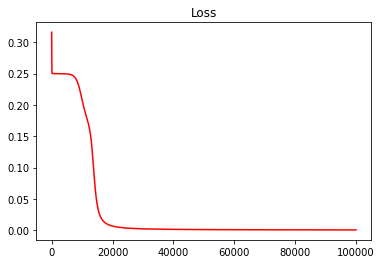

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [30]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [31]:
nn2.cost(dataset.X,dataset.y)

0.0003196698527562069